In [1]:
import yaml
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm

In [2]:
def cov_cnp(M,mu):
    cov=0
    if mu > 0:
        if M != 0:
            cov = (3. / (2. / mu + 1. / M))
        else:
            cov = mu/2.
    return cov

In [3]:
# Load data and prediction values

with open("release/data_0.yaml", "r") as stream:
    try:
        dat = yaml.safe_load(stream)
    except yaml.YAMLError as exc:
        print(exc)
dat_arr = []
mc_arr = []
lee_arr = []
bkg_arr = []
dat_err_low = []
dat_err_high = []
bins_low = []
bins_high = []
for i in range(len(dat['dependent_variables'][0]['values'])):
    dat_arr.append(dat['dependent_variables'][0]['values'][i]['value'])
    mc_arr.append(dat['dependent_variables'][1]['values'][i]['value'])
    lee_arr.append(dat['dependent_variables'][2]['values'][i]['value'])
    bkg_arr.append(dat['dependent_variables'][3]['values'][i]['value'])
    dat_err_low.append(-1*dat['dependent_variables'][0]['values'][i]['errors'][0]['asymerror']['minus'])
    dat_err_high.append(dat['dependent_variables'][0]['values'][i]['errors'][0]['asymerror']['plus'])
for i in range(len(dat['independent_variables'][0]['values'])):
    bins_low.append(dat['independent_variables'][0]['values'][i]['low'])
    bins_high.append(dat['independent_variables'][0]['values'][i]['high'])
bins = bins_low + [bins_high[-1]]
bins_centers = 0.5*(np.array(bins_low)+np.array(bins_high))

with open("release/data_1.yaml", "r") as stream:
    try:
        dat = yaml.safe_load(stream)
    except yaml.YAMLError as exc:
        print(exc)
mc_arr_nom = []
lee_arr_nom = []
for i in range(len(dat['dependent_variables'][0]['values'])):
    mc_arr_nom.append(dat['dependent_variables'][1]['values'][i]['value'])
    lee_arr_nom.append(dat['dependent_variables'][2]['values'][i]['value'])
bins = bins_low + [bins_high[-1]]
bins_centers = 0.5*(np.array(bins_low)+np.array(bins_high))

print(sum(mc_arr),sum(mc_arr_nom))
print(sum(lee_arr),sum(lee_arr_nom))
print(sum(bkg_arr))
print(sum(dat_arr))


29.045066900000002 27.392052141021132
40.600040230000005 37.43954074102113
3.2357209000000005
25


In [4]:
#Load covarince matrices

# Constrained 

# H0 cov matrix
with open("release/data_2.yaml", "r") as stream:
    try:
        cov = yaml.safe_load(stream)
    except yaml.YAMLError as exc:
        print(exc)
covm = []
for i in range(len(bins_centers)**2):
    covm.append(cov['dependent_variables'][0]['values'][i]['value'])
covm = np.array(covm).reshape((len(bins_centers),len(bins_centers)))
covm*=np.outer(np.array(mc_arr),np.array(mc_arr))
for i in range(len(bins_centers)): covm[i,i] += cov_cnp(dat_arr[i],mc_arr[i])
    
# H1 cov matrix
with open("release/data_3.yaml", "r") as stream:
    try:
        cov = yaml.safe_load(stream)
    except yaml.YAMLError as exc:
        print(exc)
lee_covm = []
for i in range(len(bins_centers)**2):
    lee_covm.append(cov['dependent_variables'][0]['values'][i]['value'])
lee_covm = np.array(lee_covm).reshape((len(bins_centers),len(bins_centers)))
lee_covm*=np.outer(np.array(lee_arr),np.array(lee_arr))
for i in range(len(bins_centers)): lee_covm[i,i] += cov_cnp(dat_arr[i],lee_arr[i])
    
# Unconstrained 

# H0 cov matrix
with open("release/data_4.yaml", "r") as stream:
    try:
        cov = yaml.safe_load(stream)
    except yaml.YAMLError as exc:
        print(exc)
covm_nom = []
for i in range(len(bins_centers)**2):
    covm_nom.append(cov['dependent_variables'][0]['values'][i]['value'])
covm_nom = np.array(covm_nom).reshape((len(bins_centers),len(bins_centers)))
covm_nom*=np.outer(np.array(mc_arr_nom),np.array(mc_arr_nom))
for i in range(len(bins_centers)): covm_nom[i,i] += cov_cnp(dat_arr[i],mc_arr_nom[i])
    
# H1 cov matrix
with open("release/data_5.yaml", "r") as stream:
    try:
        cov = yaml.safe_load(stream)
    except yaml.YAMLError as exc:
        print(exc)
lee_covm_nom = []
for i in range(len(bins_centers)**2):
    lee_covm_nom.append(cov['dependent_variables'][0]['values'][i]['value'])
lee_covm_nom = np.array(lee_covm_nom).reshape((len(bins_centers),len(bins_centers)))
lee_covm_nom*=np.outer(np.array(lee_arr_nom),np.array(lee_arr_nom))
for i in range(len(bins_centers)): lee_covm_nom[i,i] += cov_cnp(dat_arr[i],lee_arr_nom[i])
    

In [5]:
with open("release/data_6.yaml", "r") as stream:
    try:
        simlist = yaml.safe_load(stream)
    except yaml.YAMLError as exc:
        print(exc)

In [6]:
print(simlist['dependent_variables'][0]['header'])
print(simlist['dependent_variables'][1]['header'])
print(simlist['independent_variables'][0]['header'])
N = len(simlist['dependent_variables'][0]['values'])
Enu_reco = np.zeros(N)
Enu_true = np.zeros(N)
weights = np.zeros(N)
for i in range(N):
    Enu_reco[i] = simlist['dependent_variables'][0]['values'][i]['value']
    weights[i] = simlist['dependent_variables'][1]['values'][i]['value']
    Enu_true[i] = simlist['independent_variables'][0]['values'][i]['value']

{'name': '$E_\\nu$', 'units': 'MeV'}
{'name': 'weight', 'units': 'Counts in 6.67e20 POT'}
{'name': '$E_\\nu^{\\rm True}$', 'units': 'MeV'}


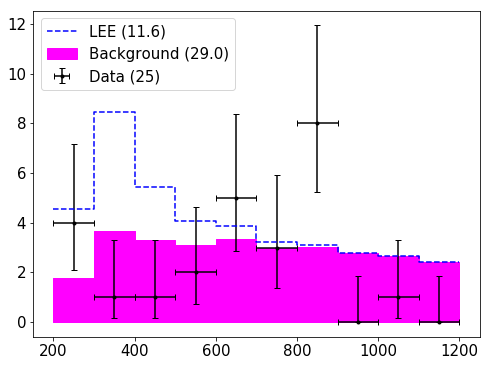

In [7]:
#Reproduce fig 16 in PRD

plt.figure(figsize=(8,6))
mc_nparr = np.array([mc_arr[0]]+mc_arr)
lee_nparr = np.array([lee_arr[0]]+lee_arr)
plt.fill_between(bins,np.zeros_like(mc_nparr),mc_nparr,step='pre',label='Background (%2.1f)'%sum(mc_arr),color='fuchsia')
plt.step(bins,lee_nparr,label='LEE (%2.1f)'%(sum(lee_arr)-sum(mc_arr)),color='blue',linestyle='--')

plt.errorbar(bins_centers,dat_arr,xerr=0.5*(np.array(bins_high)-np.array(bins_low)),yerr=(dat_err_low,dat_err_high),fmt='.',capsize=3,label='Data (%i)'%sum(dat_arr),color='black')
plt.legend(fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [8]:
print('Unconstrained Chi Squares')
# Chi square calculation 200-500 MeV
mask1D = np.where(bins_centers<550,True,False)
mask2D = np.outer(mask1D,mask1D)
Del_H0 = (np.array(mc_arr_nom) - np.array(dat_arr))[mask1D]
Del_H1 = (np.array(lee_arr_nom) - np.array(dat_arr))[mask1D]
chi2_H0 = np.matmul(np.matmul(Del_H0,np.linalg.inv(covm_nom[mask2D].reshape(len(Del_H0),len(Del_H0)))),Del_H0)
chi2_H1 = np.matmul(np.matmul(Del_H1,np.linalg.inv(lee_covm_nom[mask2D].reshape(len(Del_H1),len(Del_H1)))),Del_H1)
print('200-500 MeV',chi2_H0,chi2_H1)

# Chi square calculation 200-1200 MeV
Del_H0 = np.array(mc_arr_nom) - np.array(dat_arr)
Del_H1 = np.array(lee_arr_nom) - np.array(dat_arr)
chi2_H0 = np.matmul(np.matmul(Del_H0,np.linalg.inv(covm_nom)),Del_H0)
chi2_H1 = np.matmul(np.matmul(Del_H1,np.linalg.inv(lee_covm_nom)),Del_H1)
print('200-1200 MeV',chi2_H0,chi2_H1)

print('Constrained Chi Squares')
# Chi square calculation 200-500 MeV
mask1D = np.where(bins_centers<550,True,False)
mask2D = np.outer(mask1D,mask1D)
Del_H0 = (np.array(mc_arr) - np.array(dat_arr))[mask1D]
Del_H1 = (np.array(lee_arr) - np.array(dat_arr))[mask1D]
chi2_H0 = np.matmul(np.matmul(Del_H0,np.linalg.inv(covm[mask2D].reshape(len(Del_H0),len(Del_H0)))),Del_H0)
chi2_H1 = np.matmul(np.matmul(Del_H1,np.linalg.inv(lee_covm[mask2D].reshape(len(Del_H1),len(Del_H1)))),Del_H1)
print('200-500 MeV',chi2_H0,chi2_H1)

# Chi square calculation 200-1200 MeV
Del_H0 = np.array(mc_arr) - np.array(dat_arr)
Del_H1 = np.array(lee_arr) - np.array(dat_arr)
chi2_H0 = np.matmul(np.matmul(Del_H0,np.linalg.inv(covm)),Del_H0)
chi2_H1 = np.matmul(np.matmul(Del_H1,np.linalg.inv(lee_covm)),Del_H1)
print('200-1200 MeV',chi2_H0,chi2_H1)




Unconstrained Chi Squares
200-500 MeV 6.05835255407 8.30166127364
200-1200 MeV 23.0171834024 25.3683351524
Constrained Chi Squares
200-500 MeV 7.90819110669 17.3026254892
200-1200 MeV 25.2770450633 36.3522521088


27.392052141


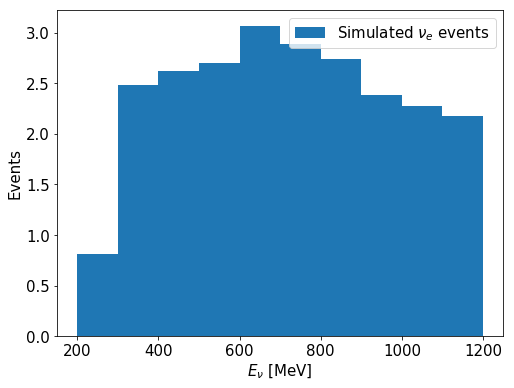

In [9]:
# Plot nue MC

plt.figure(figsize=(8,6))
mc_arr_unconstr,_,_ = plt.hist(Enu_reco,weights=weights,bins=bins,label=r'Simulated $\nu_e$ events')
print(sum(mc_arr_unconstr)+sum(bkg_arr))
plt.xlabel(r'$E_\nu$ [MeV]',fontsize=15)
plt.ylabel('Events',fontsize=15)
plt.legend(fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [46]:
#Load covarince matrices

# H0 cov matrix
with open("release/data_3.yaml", "r") as stream:
    try:
        cov = yaml.safe_load(stream)
    except yaml.YAMLError as exc:
        print(exc)
covm_unconstr = []
for i in range(len(bins_centers)**2):
    covm_unconstr.append(cov['dependent_variables'][0]['values'][i]['value'])
covm_unconstr = np.array(covm_unconstr).reshape((len(bins_centers),len(bins_centers)))
covm_unconstr*=np.outer(mc_arr_unconstr+np.array(bkg_arr),mc_arr_unconstr+np.array(bkg_arr))
print(mc_arr_unconstr+np.array(bkg_arr))
for i in range(len(bins_centers)): covm_unconstr[i,i] += cov_cnp(dat_arr[i],(mc_arr_unconstr+np.array(bkg_arr))[i])


[ 1.72101587  3.21973284  2.91622422  2.82381642  3.14815038  2.97769629
  2.8726438   2.57705986  2.55836486  2.5773476 ]


In [48]:
# Chi square calculation 200-1200 MeV
Del_H0 = mc_arr_unconstr+np.array(bkg_arr) - np.array(dat_arr)
chi2_H0 = np.matmul(np.matmul(Del_H0,np.linalg.inv(covm_unconstr)),Del_H0)
print(chi2_H0)

# Chi square calculation 200-500 MeV
mask1D = np.where(bins_centers<550,True,False)
mask2D = np.outer(mask1D,mask1D)
Del_H0 = (mc_arr_unconstr+np.array(bkg_arr) - np.array(dat_arr))[mask1D]
chi2_H0 = np.matmul(np.matmul(Del_H0,np.linalg.inv(covm_unconstr[mask2D].reshape(len(Del_H0),len(Del_H0)))),Del_H0)
print(chi2_H0)

23.0171834024
6.05835255407


/anaconda/envs/p36workshop/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


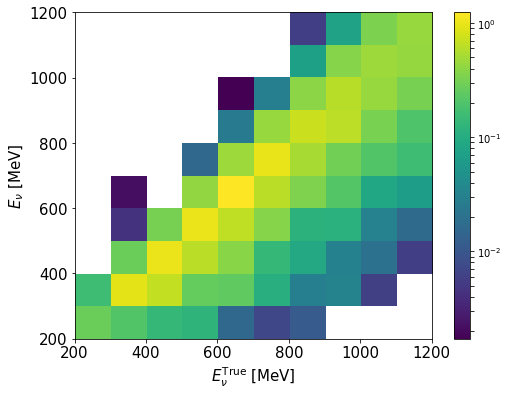

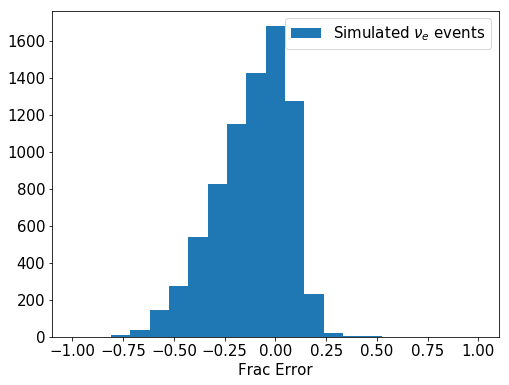

In [19]:
# Get energy smearing matrix

plt.figure(figsize=(8,6))
plt.hist2d(Enu_true,Enu_reco,weights=weights,bins=bins,label=r'Simulated $\nu_e$ events',norm=LogNorm())
plt.colorbar()
plt.ylabel(r'$E_\nu$ [MeV]',fontsize=15)
plt.xlabel(r'$E_\nu^{\rm True}$ [MeV]',fontsize=15)
plt.legend(fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

plt.figure(figsize=(8,6))
plt.hist((Enu_reco-Enu_true)/Enu_true,bins=21,range=(-1,1),label=r'Simulated $\nu_e$ events')
plt.xlabel(r'Frac Error',fontsize=15)
plt.legend(fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()